In [27]:
import requests
from IPython.display import Image, display
from PIL import Image
from io import BytesIO

In [28]:
shadow_analysis_api = "http://3.144.198.3:4000/analyze"
visualization_api = "http://3.144.198.3:3000/visualize"

In [29]:
def perform_shadow_analysis():
    """
    Calls shadow analysis api endpoint.
    Returns:
    - str: Record identifier of the shadow data
    """
    response = requests.get(shadow_analysis_api)
    if response.status_code == 200:
        response_json = response.json()
        record_id = response_json.get('record_id')
        print(f"Shadow Analysis Completed. Output stored in Mongo with ID: {record_id}")
        return record_id
    else:
        raise Exception(f"Failed to do shadow analysis. Response code: {response.status_code}")


def visualize_shadow_data(record_id):
    """
    Calls visualization api endpoint.
    """
    response = requests.get(f"{visualization_api}?record_id={record_id}", timeout=120)
    if response.status_code == 200:
        print(f"Visualizing Shadow Data from MongoDB")
        image_bytes = BytesIO(response.content)
        image = Image.open(image_bytes)
        display(image)
    else:
        raise Exception(f"Failed to visualize shadow data. Response code: {response.status_code}")


Shadow Analysis Completed. Output stored in Mongo with ID: 652d95d4f058d09a37a37610
Visualizing Shadow Data from MongoDB


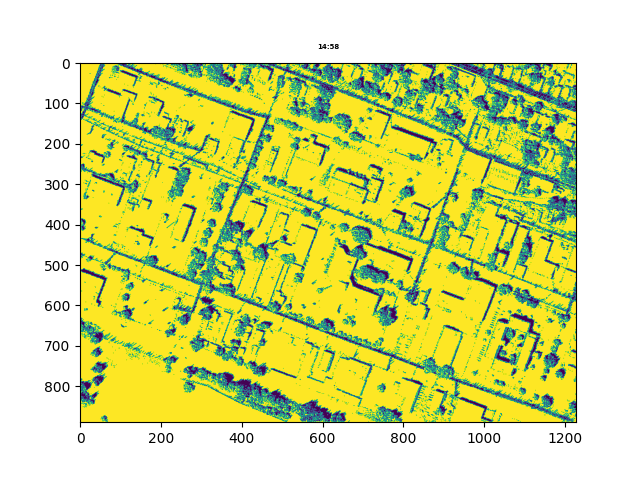

In [30]:
#Validate shadow analysis and visualization
record_id = perform_shadow_analysis()
visualize_shadow_data(record_id)
